In [315]:
import pandas as pd
import numpy as np

In [316]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [317]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [318]:
# dummy values for ocean_proximity
# data = pd.get_dummies(data,drop_first=True)
# data.isna().sum()

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [320]:
data['total_bedrooms'].isnull().any()

True

In [321]:
# Removing null values in 'total_bedrooms' with median value
median_bedrooms = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_bedrooms,inplace=True)
data['total_bedrooms'].isnull().any()

False

C:\Users\aravi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\aravi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\aravi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\aravi\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

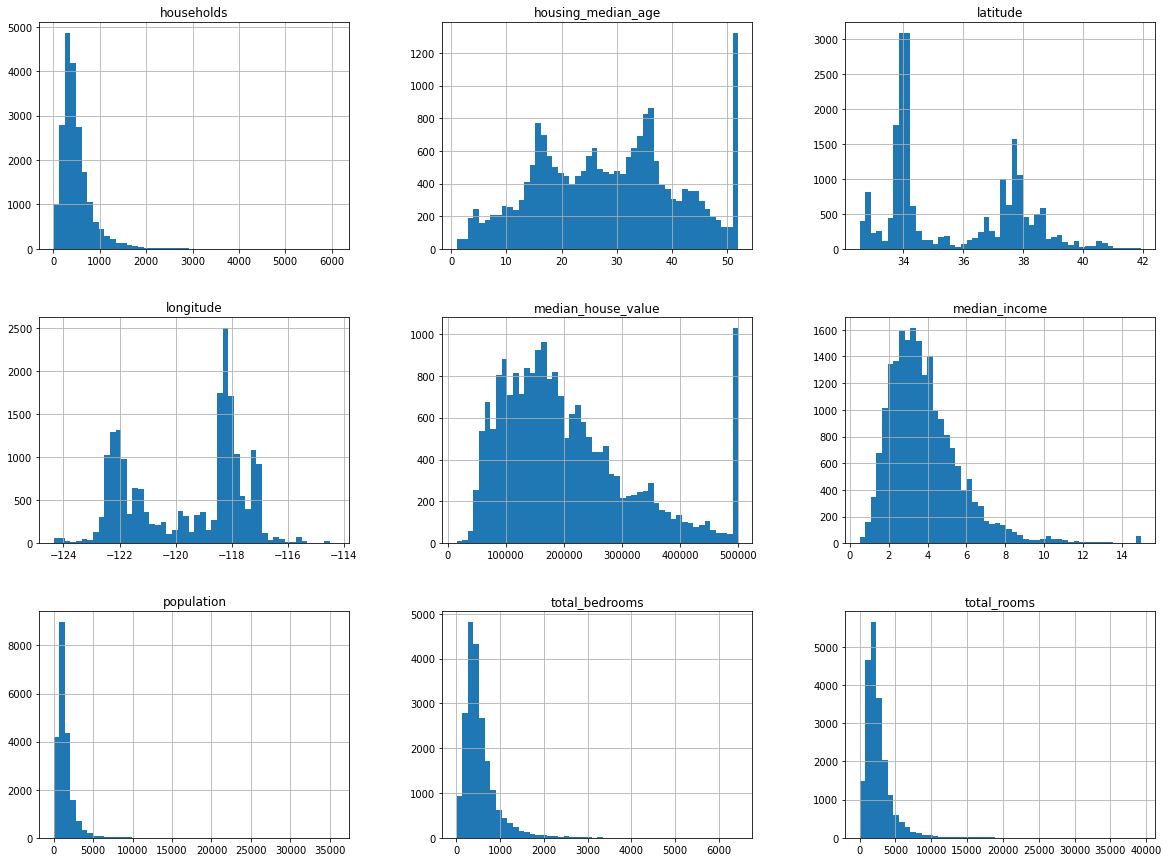

In [322]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

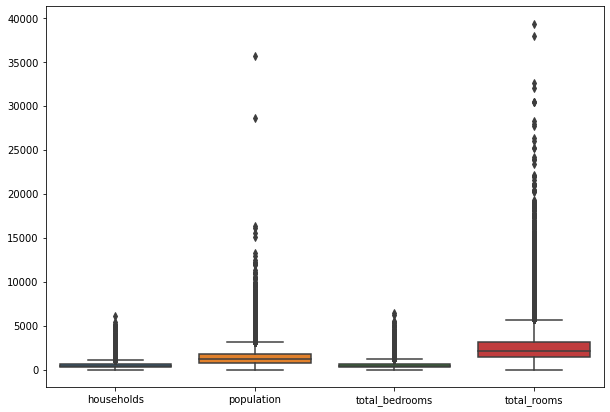

In [323]:
# Outliers
import seaborn as sns
columns = ['households','population','total_bedrooms','total_rooms']
plt.figure(figsize=(10,7))
sns.boxplot(data=data[columns])


In [324]:
# calculating number of outliers in data. (ignore that of ocean_proximity)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
High = (Q3) + 1.5*IQR
Low = (Q1) - 1.5*IQR

((data < Low) | (data > High)).sum()

households            1220
housing_median_age       0
latitude                 0
longitude                0
median_house_value    1071
median_income          681
ocean_proximity          0
population            1196
total_bedrooms        1306
total_rooms           1287
dtype: int64

In [325]:
corr = data.corr()
corr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.0691197,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0664839,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.927058,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.0691197,-0.0664839,-0.319026,0.927058,1,0.873535,0.974366,-0.00761687,0.0494569
population,0.0997732,-0.108785,-0.296244,0.857126,0.873535,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.974366,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00761687,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0494569,-0.0246497,0.0658427,0.688075,1


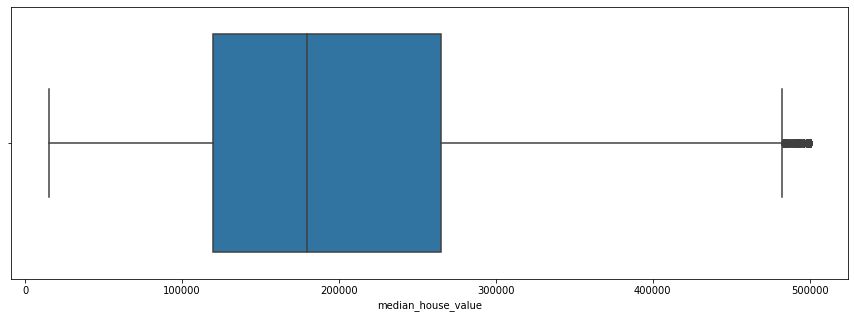

In [326]:

plt.figure(figsize=(15,5))
sns.boxplot(x=data['median_house_value'])

In [327]:
data = data.loc[data['median_house_value']<500001,:]


In [328]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [329]:
data['ocean_proximity'].value_counts()


<1H OCEAN     8604
INLAND        6524
NEAR OCEAN    2446
NEAR BAY      2096
ISLAND           5
Name: ocean_proximity, dtype: int64

In [330]:
def to_numbers(val):
    if val == '<1H OCEAN':
        return 0
    elif val == 'INLAND':
        return 1
    elif val == 'NEAR OCEAN':
        return 2
    elif val == 'NEAR BAY':
        return 3
    elif val == 'ISLAND':
        return 4
data['ocean_proximity'] = data['ocean_proximity'].apply(to_numbers)
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3


In [331]:
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
                        'median_income','ocean_proximity'],data=data)
y=pd.DataFrame(columns=['median_house_value'],data=data)
print(X.shape,y.shape)

(19675, 9) (19675, 1)


In [332]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [333]:
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [334]:
#test train split
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=0)
print(X_train_full.shape,'  ',X_test.shape)
print(y_train_full.shape,'  ',y_test.shape)
print(X_train.shape,'  ',X_valid.shape)
print(y_train.shape,'  ',y_valid.shape)

(14756, 9)    (4919, 9)
(14756, 1)    (4919, 1)
(11067, 9)    (3689, 9)
(11067, 1)    (3689, 1)


In [335]:
y.to_numpy()

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [336]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [337]:
X_train

array([[ 0.18091688, -0.67427494,  0.52934193, ...,  0.11851522,
        -0.29445857,  1.11511005],
       [ 0.71456479, -0.75817027,  0.37029576, ..., -0.08952938,
        -1.08061438, -0.91015013],
       [-1.45992578,  0.98964914,  1.56314203, ...,  0.2738903 ,
         0.18608674,  2.12774014],
       ...,
       [ 0.71456479, -0.71622261,  1.64266512, ..., -0.22120318,
         0.23690507, -0.91015013],
       [-1.44496369,  0.98032743,  1.40409586, ...,  1.60906262,
         0.89480509,  2.12774014],
       [ 0.60484279, -0.7069009 ,  1.00648044, ...,  0.36869544,
         0.35529014, -0.91015013]])

In [338]:
X_train.shape[1:]

(9,)

In [339]:
#model building
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,kernel_initializer='normal', activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(256,kernel_initializer='normal', activation="relu"),
    tf.keras.layers.Dense(128,kernel_initializer='normal', activation="relu"),
    tf.keras.layers.Dense(64,kernel_initializer='normal', activation="relu"),
    tf.keras.layers.Dense(32,kernel_initializer='normal', activation="relu"),
    tf.keras.layers.Dense(8,kernel_initializer='normal', activation="relu"),
    tf.keras.layers.Dense(1)
])


In [340]:
# compile the model

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               5120      
_________________________________________________________________
dense_88 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_89 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_90 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_91 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_93 (Dense)             (None, 1)               

In [341]:
history = model.fit(X_train, y_train.to_numpy(), epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
346/346 [==============================] - 1s 2ms/step - loss: 15800684544.0000 - val_loss: 4717354496.0000
Epoch 2/10
346/346 [==============================] - 1s 2ms/step - loss: 3923419136.0000 - val_loss: 3748615680.0000
Epoch 3/10
346/346 [==============================] - 1s 2ms/step - loss: 3505628928.0000 - val_loss: 3590523136.0000
Epoch 4/10
346/346 [==============================] - 1s 2ms/step - loss: 3395087360.0000 - val_loss: 3578542848.0000
Epoch 5/10
346/346 [==============================] - 1s 2ms/step - loss: 3346192640.0000 - val_loss: 3582380544.0000
Epoch 6/10
346/346 [==============================] - 1s 2ms/step - loss: 3316294144.0000 - val_loss: 3484627200.0000
Epoch 7/10
346/346 [==============================] - 1s 2ms/step - loss: 3303735808.0000 - val_loss: 3450230784.0000
Epoch 8/10
346/346 [==============================] - 1s 2ms/step - loss: 3282578944.0000 - val_loss: 3418441728.0000
Epoch 9/10
346/346 [==============================] - 1

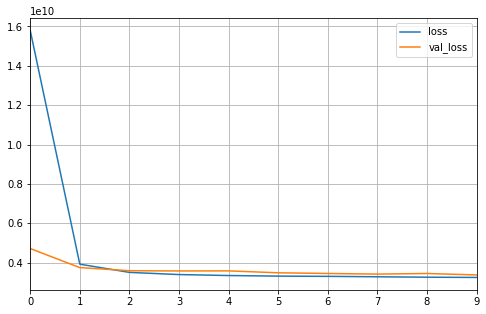

In [342]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [343]:
y_pred = model.predict(X_test)


In [344]:
model.evaluate(X_test,y_test)

154/154 [==============================] - 0s 848us/step - loss: 3414044416.0000


3414044416.0

In [345]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,y,test_size = 0.2, random_state=0)

In [346]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train1,Y_train1)

LinAlgError: SVD did not converge in Linear Least Squares